In [13]:
import pandas
import statsmodels.formula.api as smf

import graphing

import matplotlib.pyplot as plt

import seaborn as sns
import joblib


## **Module 1.1 Introduction to machine learning**

In [3]:
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

dataset.head()

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57


In [4]:
formula = "boot_size ~ harness_size"

model = smf.ols(formula = formula, data = dataset)

if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

Model selected but it does not have parameters set. We need to train it!


In [5]:
fitted_model = model.fit()

print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept: {fitted_model.params[0]}")

The following model parameters have been found:
Line slope: 0.5859254167382717
Line Intercept: 5.719109812682555


In [6]:
fitted_model.params

Intercept       5.719110
harness_size    0.585925
dtype: float64

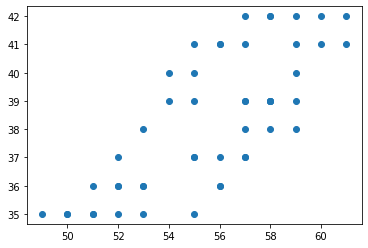

In [7]:
plt.scatter(dataset['harness_size'], dataset['boot_size'])

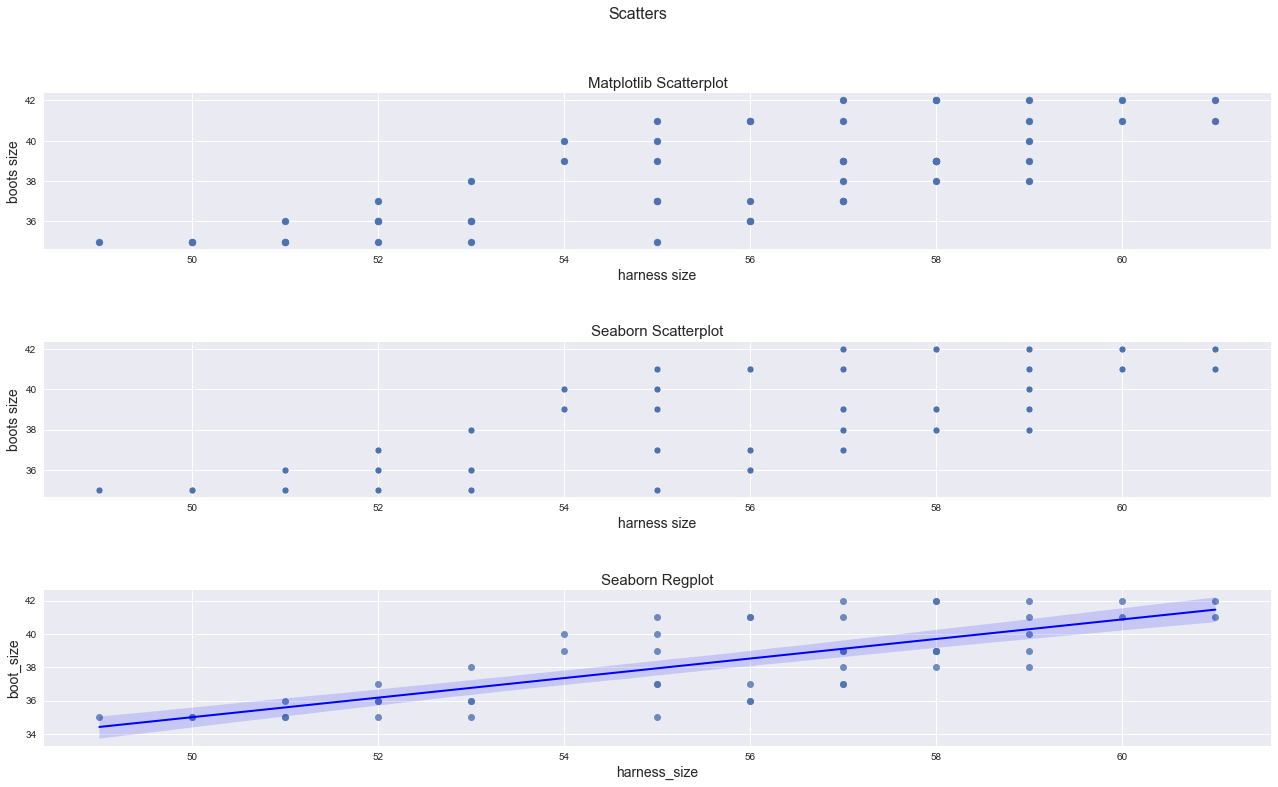

In [8]:
plt.style.use('seaborn')


fig, axs = plt.subplot_mosaic([['0'],
                               ['1'],
                               ['2']],
                               figsize=(22, 12))

fig.suptitle('Scatters', size=16)

plt.subplots_adjust(wspace=.2)
plt.subplots_adjust(hspace=.6)

# matplotlib scatterplot
axs['0'].set_title('Matplotlib Scatterplot', size=15)
axs['0'].set_xlabel('harness size', size=14)
axs['0'].set_ylabel('boots size', size=14)
axs['0'].scatter(dataset['harness_size'], dataset['boot_size'])

# seaborn scatterplot
axs['1'].set_title('Seaborn Scatterplot', size=15)
axs['1'].set_xlabel('harness size', size=14)
axs['1'].set_ylabel('boots size', size=14)
sns.scatterplot(data=dataset, x=dataset['harness_size'], y=dataset['boot_size'], ax=axs['1'])

# seaborn regplot
axs['2'].set_title('Seaborn Regplot', size=15)
axs['2'].set_xlabel('harness size', size=14)
axs['2'].set_ylabel('boots size', size=14)
sns.regplot(data=dataset, x=dataset['harness_size'], y=dataset['boot_size'], ax=axs['2'], line_kws={"lw": 2, "color": "blue"})



plt.show()

In [9]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [30.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print(f'Estimated approximate_boot_size: {approximate_boot_size[0]}')

Estimated approximate_boot_size: 23.58983502319984


In [10]:
harness_size

{'harness_size': [30.5]}

## **Module 1.2 use machine learning models**

In [15]:

# Fit a simple model that finds a linear relationship
# between boot size and harness size, which we can use later
# to predict a dog's boot size, given their harness size
model = smf.ols(formula = "boot_size ~ harness_size", data = data).fit()
print("Model trained!")

model_filename = './avalanche_dog_boot_model.pkl'
joblib.dump(model, model_filename)
print("Model saved!")

Model trained!
Model saved!


In [17]:
model_loaded = joblib.load(model_filename)

print("We have loaded a model with the following parameters:")
print(model_loaded.params)

We have loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


In [21]:
# Let's write a function that loads and uses our model
def load_model_and_predict(harness_size):
    '''
    This function loads a pretrained model. It uses the model
    with the customer's dog's harness size to predict the size of
    boots that will fit that dog.

    harness_size: The dog harness size, in cm 
    '''

    # Load the model from file and print basic information about it
    loaded_model = joblib.load(model_filename)

    print("We've loaded a model with the following parameters:")
    print(loaded_model.params)

    # Prepare data for the model
    inputs = {"harness_size":[harness_size]} 

    # Use the model to make a prediction
    predicted_boot_size = loaded_model.predict(inputs)[0]

    return predicted_boot_size

# Practice using our model
predicted_boot_size = load_model_and_predict(70)

print("Predicted dog boot size:", predicted_boot_size)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64
Predicted dog boot size: 46.73388898436157


## Real-world use
We've done it; we can predict an avalanche dog's boot size based on the size of their harness. Our last step is to use this to warn people if they might be buying the wrong size doggy boots.

As an example, we make a function that accepts the harness size and the size of the boots selected, then returns a message for the customer. We'd integrate this function into our online store.

In [22]:
def check_size_of_boots(selected_harness_size, selected_boot_size):


    # Load the model from file and print basic information about it
    loaded_model = joblib.load(model_filename)


        # Estimate the customer's dog's boot size
    estimated_boot_size = load_model_and_predict(selected_harness_size)

    # Round to the nearest whole number because we don't sell partial sizes
    estimated_boot_size = int(round(estimated_boot_size))

    # Check if the boot size selected is appropriate
    if selected_boot_size == estimated_boot_size:
        # The selected boots are probably OK
        answer = f"Great choice! We think these boots will fit your avalanche dog well."

    if selected_boot_size < estimated_boot_size:
        # Selected boots might be too small 
        answer = f"boots are TOO SMALL. We recommend a doggy boots size: {estimated_boot_size}."

    if selected_boot_size > estimated_boot_size:
        # Selected boots might be too big 
        answer = f"boots are TOO BIG. We recommend a doggy boots size: {estimated_boot_size}."


    print(answer)

In [26]:
check_size_of_boots(5, 19)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64
boots are TOO BIG. We recommend a doggy boots size: 9.
